In [4]:
from qiskit import *

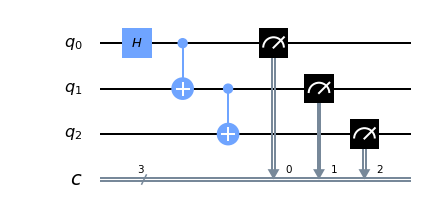

In [5]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)

circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure(range(nqubits), range(nqubits))

%matplotlib inline
circuit.draw(output='mpl')

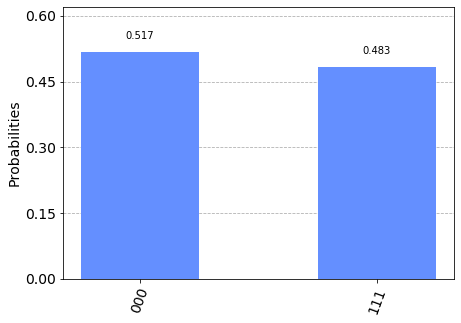

In [6]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots = 1024).result()

from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts(circuit))

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

In [8]:
job = execute(circuit, backend = device, shots = 1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

5f05e201b68913001417104d
Job Status: job has successfully run


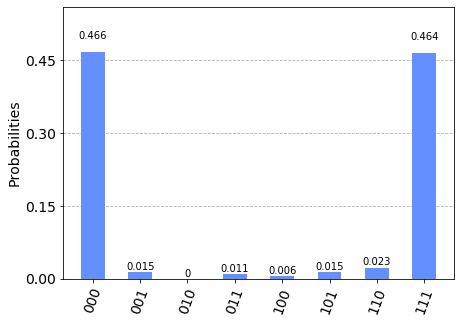

In [9]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [10]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [11]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')

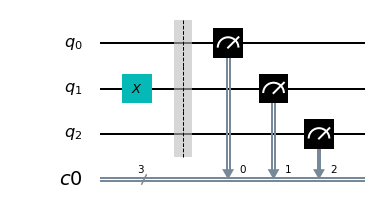

In [13]:
cal_circuits[2].draw(output='mpl')

In [14]:
len(cal_circuits)

8

In [16]:
cal_job = execute(cal_circuits, backend=device, shots=1024, optimization_level=0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_result = cal_job.result()

5f05e2a6ae6c02001533dc5f
Job Status: job has successfully run


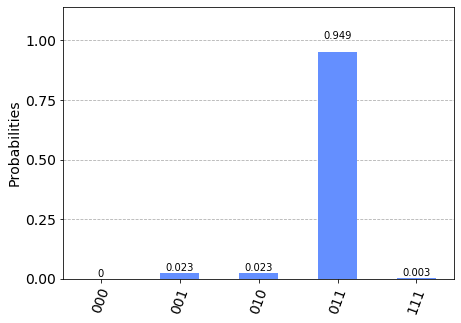

In [17]:
plot_histogram(cal_result.get_counts(cal_circuits[3]))

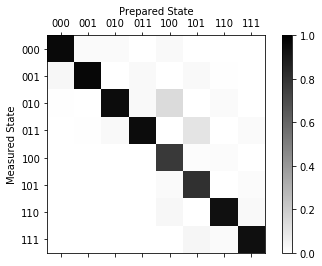

In [18]:
meas_fitter = CompleteMeasFitter(cal_result, state_labels)
meas_fitter.plot_calibration()

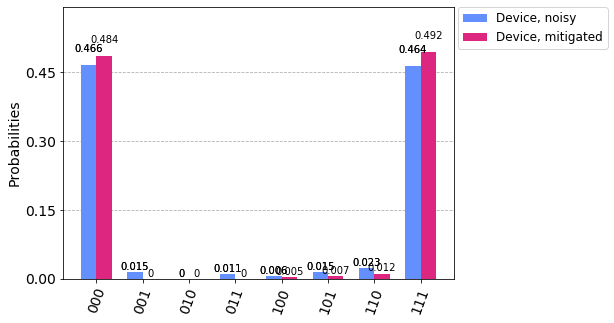

In [19]:
meas_filter = meas_fitter.filter
mitigated_result = meas_filter.apply(device_result)

device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)

plot_histogram([device_counts, mitigated_counts], legend = ["Device, noisy", "Device, mitigated"])

## Different circuit

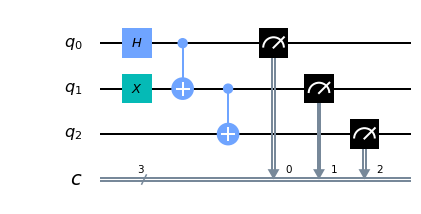

In [20]:
circuit2 = QuantumCircuit(3, 3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2], [0,1,2])
circuit2.draw(output='mpl')

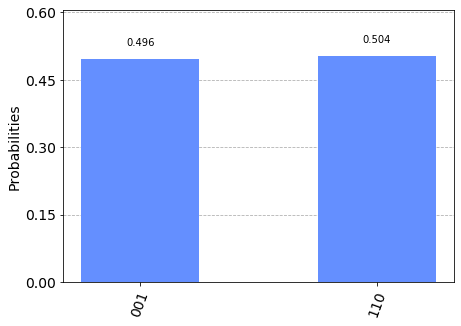

In [21]:
plot_histogram(execute(circuit2, backend=simulator, shots=1024).result().get_counts(circuit2))

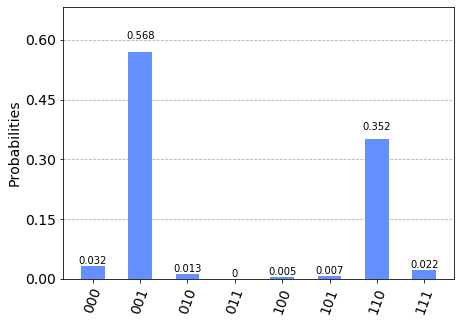

In [26]:
device_counts_2 = execute(circuit2, backend=device, shots=1024).result().get_counts()
plot_histogram(device_counts_2)

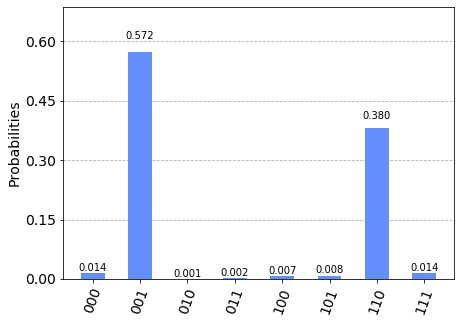

In [25]:
device_mitigated_counts_2 = meas_filter.apply(device_counts_2)
plot_histogram(device_mitigated_counts_2)